In [179]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier
import time
from sklearn.model_selection import cross_val_score, KFold

In [180]:
dataset = pd.read_csv("conflict_data_pak.csv")

In [181]:
dataset

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,NaN,NaN,#date+year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#date+end,NaN,NaN,NaN,NaN,#affected+killed,NaN,NaN,NaN,NaN
1,59553.0,PAK-1990-1-345-5,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1990-10-04 00:00:00.000,0.0,2.0,0.0,0.0,2,2.0,2.0,750.0,770.0
2,372969.0,IND-1990-1-422-1,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1990-12-26 00:00:00.000,0.0,0.0,1.0,0.0,1,1.0,1.0,750.0,770.0
3,51736.0,PAK-1991-1-345-5,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1991-01-15 00:00:00.000,0.0,0.0,2.0,0.0,2,2.0,2.0,750.0,770.0
4,372974.0,IND-1991-1-422-0,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1991-02-04 00:00:00.000,0.0,0.0,1.0,0.0,1,1.0,1.0,750.0,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,425040.0,PAK-2021-1-16177-46,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,2021-12-16 00:00:00.000,0.0,0.0,0.0,0.0,0,11.0,0.0,770.0,NaN
6413,425056.0,PAK-2021-1-16177-47,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,2021-12-20 00:00:00.000,5.0,0.0,0.0,0.0,5,5.0,5.0,770.0,NaN
6414,425057.0,PAK-2021-1-16177-48,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,2021-12-20 00:00:00.000,4.0,0.0,0.0,0.0,4,4.0,4.0,770.0,NaN
6415,425076.0,PAK-2021-1-16177-49,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,2021-12-24 00:00:00.000,2.0,0.0,0.0,0.0,2,2.0,0.0,770.0,NaN


In [182]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [183]:
dataset["conflict_name"].unique()

array([nan, 'India - Pakistan', 'Iraq: Government',
       'Pakistan: Balochistan', 'Afghanistan: Government',
       'Iran: Government', 'India: Kashmir', 'Pakistan: Government',
       'United States of America: Government',
       'Government of Afghanistan - Civilians',
       'Government of India - Civilians', 'IS - Civilians',
       'BLA - Civilians', 'Taleban - Civilians', 'Jondullah - Civilians',
       'TTP - Civilians', 'LeJ - Civilians', 'al-Qaida  - Civilians',
       'Fedayeen Islam - Civilians', 'Lashkar-e-Islam - Civilians',
       'TTP-Islahi - Civilians', 'UBA - Civilians',
       'Ansaar ul-Islam - Lashkar-e-Islam', 'Bangesh - Turi',
       'IMU - Lashkhar of Wazir tribe', 'Forces of Shah Sahib - TTP',
       'Kachai sub-tribe of Bangesh - Mishti',
       'Lashkar of Salarzai tribe - TTP', 'Mangal - Turi', 'MQM - MQM-H',
       'Lashkar of Orakzai tribe - TTP',
       'Forces of Turkestan Bhittani - TTP', 'Lashkar-e-Islam - TTP',
       'Forces of Momin Afridi - TTP 

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6416 non-null   float64
 1   relid              6416 non-null   object 
 2   year               6417 non-null   object 
 3   active_year        6416 non-null   float64
 4   code_status        6416 non-null   object 
 5   type_of_violence   6416 non-null   float64
 6   conflict_dset_id   6416 non-null   float64
 7   conflict_new_id    6416 non-null   float64
 8   conflict_name      6416 non-null   object 
 9   dyad_dset_id       6416 non-null   float64
 10  dyad_new_id        6416 non-null   float64
 11  dyad_name          6416 non-null   object 
 12  side_a_dset_id     6416 non-null   float64
 13  side_a_new_id      6416 non-null   float64
 14  side_a             6417 non-null   object 
 15  side_b_dset_id     6416 non-null   float64
 16  side_b_new_id      6416 

In [185]:
dataset.min()

C:\Users\coold\AppData\Local\Temp\ipykernel_13324\2445678953.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.min()


id                                                             51720.0
year                                                        #date+year
active_year                                                        0.0
type_of_violence                                                   1.0
conflict_dset_id                                                 130.0
conflict_new_id                                                  218.0
dyad_dset_id                                                     130.0
dyad_new_id                                                      422.0
side_a_dset_id                                                     3.0
side_a_new_id                                                      3.0
side_a                                               #group+name+first
side_b_dset_id                                                   142.0
side_b_new_id                                                      1.0
side_b                                              #group+name+second
number

In [186]:
dataset.max()

C:\Users\coold\AppData\Local\Temp\ipykernel_13324\873862768.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.max()


id                                                            426601.0
year                                                              2021
active_year                                                        1.0
type_of_violence                                                   3.0
conflict_dset_id                                               15090.0
conflict_new_id                                                13937.0
dyad_dset_id                                                   16177.0
dyad_new_id                                                    16177.0
side_a_dset_id                                                  5895.0
side_a_new_id                                                   5895.0
side_a                                                        al-Qaida
side_b_dset_id                                                  9999.0
side_b_new_id                                                   7542.0
side_b                                                        al-Qaida
number

In [187]:
dataset["where_coordinates"]

0             #loc+name
1           Kel village
2       Shahkot village
3         Athmuqam town
4         Athmuqam town
             ...       
6412          Tump town
6413      Sibi district
6414        Turbat town
6415      Kech district
6416        Turbat town
Name: where_coordinates, Length: 6417, dtype: object

In [188]:
dataset["where_coordinates"].unique()

array(['#loc+name', 'Kel village', 'Shahkot village', ...,
       'Barshonki village', 'Babar Kach town', 'Abdoi area'], dtype=object)

In [189]:
dataset.count()

id                   6416
relid                6416
year                 6417
active_year          6416
code_status          6416
type_of_violence     6416
conflict_dset_id     6416
conflict_new_id      6416
conflict_name        6416
dyad_dset_id         6416
dyad_new_id          6416
dyad_name            6416
side_a_dset_id       6416
side_a_new_id        6416
side_a               6417
side_b_dset_id       6416
side_b_new_id        6416
side_b               6417
number_of_sources    6416
source_article       6417
source_office        2148
source_date          2148
source_headline      2149
source_original      4128
where_prec           6416
where_coordinates    6417
where_description    6361
adm_1                6372
adm_2                6238
latitude             6417
longitude            6417
geom_wkt             6416
priogrid_gid         6416
country              6417
iso3                 6417
country_id           6416
region               6417
event_clarity        6416
date_prec   

In [190]:
dataset.corr()

,id,active_year,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,side_a_dset_id,side_a_new_id,side_b_dset_id,...,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,high,low,gwnoa,gwnob
id,1.000000,0.009078,-0.149694,-0.058683,-0.051691,0.113225,0.108845,-0.093171,-0.093171,-0.002872,...,0.031235,0.021783,-0.049239,-0.035032,0.007485,-0.048773,-0.064452,-0.086200,-0.145384,NaN
active_year,0.009078,1.000000,-0.240612,-0.126581,-0.131061,-0.101961,-0.115282,-0.095424,-0.095424,-0.203190,...,-0.000120,-0.010708,0.019541,0.065994,-0.010545,0.013347,0.031974,0.047597,-0.036513,NaN
type_of_violence,-0.149694,-0.240612,1.000000,0.275028,0.292131,0.084916,0.142916,0.357463,0.357463,0.880689,...,0.003146,0.016810,-0.088734,-0.144657,0.318713,-0.007783,0.018244,0.045711,0.001563,NaN
conflict_dset_id,-0.058683,-0.126581,0.275028,1.000000,0.995212,0.636705,0.636835,0.656616,0.656616,0.013082,...,0.070970,0.053732,0.034585,-0.040331,-0.018591,0.032573,0.014084,0.034724,0.016361,NaN
conflict_new_id,-0.051691,-0.131061,0.292131,0.995212,1.000000,0.632723,0.639306,0.673889,0.673889,0.044076,...,0.068122,0.050100,0.031299,-0.043230,-0.004472,0.030205,0.013785,0.035099,0.016370,NaN
dyad_dset_id,0.113225,-0.101961,0.084916,0.636705,0.632723,1.000000,0.996521,0.408996,0.408996,0.110495,...,0.040876,0.032972,0.055409,-0.000566,-0.046864,0.015982,0.002951,0.017718,0.062371,NaN
dyad_new_id,0.108845,-0.115282,0.142916,0.636835,0.639306,0.996521,1.000000,0.433592,0.433592,0.171105,...,0.038972,0.031747,0.048783,-0.009031,-0.023491,0.014240,0.003727,0.020074,0.062382,NaN
side_a_dset_id,-0.093171,-0.095424,0.357463,0.656616,0.673889,0.408996,0.433592,1.000000,1.000000,0.234923,...,0.041617,0.009695,-0.030504,-0.060472,0.056317,0.029142,0.012676,0.038681,0.999809,NaN
side_a_new_id,-0.093171,-0.095424,0.357463,0.656616,0.673889,0.408996,0.433592,1.000000,1.000000,0.234923,...,0.041617,0.009695,-0.030504,-0.060472,0.056317,0.029142,0.012676,0.038681,0.999809,NaN
side_b_dset_id,-0.002872,-0.203190,0.880689,0.013082,0.044076,0.110495,0.171105,0.234923,0.234923,1.000000,...,-0.025113,-0.012575,-0.090479,-0.143970,0.331752,-0.023974,0.005773,0.023266,-0.075975,NaN


In [191]:
dataset.describe()

,id,active_year,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,side_a_dset_id,side_a_new_id,side_b_dset_id,...,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,high,low,gwnoa,gwnob
count,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,...,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000,5390.000000,429.0
mean,127731.381079,0.961347,1.247350,964.627805,939.500935,1785.537251,1847.090399,228.302525,228.302525,1385.876559,...,1.016054,1.073566,0.872818,2.777431,1.067643,2.019171,7.748286,6.404146,708.511503,770.0
std,102750.065185,0.192782,0.600397,2193.535935,2074.176727,3121.144295,3111.947306,458.533343,458.533343,2826.492892,...,0.125692,0.359110,2.543165,6.491558,5.768172,20.764510,23.104131,13.356968,203.310734,0.0
min,51720.000000,0.000000,1.000000,130.000000,218.000000,130.000000,422.000000,3.000000,3.000000,142.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,770.0
25%,56569.750000,1.000000,1.000000,404.000000,404.000000,857.000000,857.000000,142.000000,142.000000,356.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,770.000000,770.0
50%,59753.500000,1.000000,1.000000,404.000000,404.000000,857.000000,857.000000,142.000000,142.000000,356.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,770.000000,770.0
75%,190449.250000,1.000000,1.000000,404.000000,404.000000,857.000000,878.000000,142.000000,142.000000,399.000000,...,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,8.000000,7.000000,770.000000,770.0
max,426601.000000,1.000000,3.000000,15090.000000,13937.000000,16177.000000,16177.000000,5895.000000,5895.000000,9999.000000,...,2.000000,5.000000,65.000000,140.000000,149.000000,1428.000000,1428.000000,728.000000,770.000000,770.0


In [192]:
dataset.dtypes

id                   float64
relid                 object
year                  object
active_year          float64
code_status           object
type_of_violence     float64
conflict_dset_id     float64
conflict_new_id      float64
conflict_name         object
dyad_dset_id         float64
dyad_new_id          float64
dyad_name             object
side_a_dset_id       float64
side_a_new_id        float64
side_a                object
side_b_dset_id       float64
side_b_new_id        float64
side_b                object
number_of_sources    float64
source_article        object
source_office         object
source_date           object
source_headline       object
source_original       object
where_prec           float64
where_coordinates     object
where_description     object
adm_1                 object
adm_2                 object
latitude              object
longitude             object
geom_wkt              object
priogrid_gid         float64
country               object
iso3          

In [193]:
dataset["code_status"].unique()

array([nan, 'Clear'], dtype=object)

In [194]:
dataset["where_description"]

0                                                     NaN
1                          Kel sector of the control line
2                   Pakistani-held territory near Shakhot
3                                                Athmuqam
4       Shahkot and Athmuqam areas in the Neelam valle...
                              ...                        
6412    in Azghandi area between Abdoi and Wakai, in T...
6413                                        Sibi District
6414                                          Turbat town
6415                          check post in Kech District
6416                                               Turbat
Name: where_description, Length: 6417, dtype: object

In [195]:
dataset["dyad_name"]

0                                                NaN
1       Government of India - Government of Pakistan
2       Government of India - Government of Pakistan
3       Government of India - Government of Pakistan
4       Government of India - Government of Pakistan
                            ...                     
6412                   Government of Pakistan - BRAS
6413                   Government of Pakistan - BRAS
6414                   Government of Pakistan - BRAS
6415                   Government of Pakistan - BRAS
6416                   Government of Pakistan - BRAS
Name: dyad_name, Length: 6417, dtype: object

In [196]:
dataset["year"].unique()

array(['#date+year', '1990', '1991', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2004', '2005', '2006', '2007', '2008',
       '2009', '1992', '1989'], dtype=object)

In [197]:
dataset["year"].min()

'#date+year'

In [198]:
dataset["year"].max()

'2021'

In [199]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [200]:
dataset.columns = dataset.columns.str.replace('side_a', 'Group_A')

In [201]:
dataset.columns = dataset.columns.str.replace('side_b', 'Group_B')

In [202]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [203]:
dataset["Group_A"].unique()

array(['#group+name+first', 'Government of India', 'Government of Iraq',
       'Government of Pakistan', 'Government of Afghanistan',
       'Government of Iran', 'Government of United States of America',
       'IS', 'BLA', 'Taleban', 'Jondullah', 'TTP', 'LeJ', 'al-Qaida',
       'Fedayeen Islam', 'Lashkar-e-Islam', 'TTP-Islahi', 'UBA',
       'Ansaar ul-Islam', 'Bangesh', 'IMU', 'Forces of Shah Sahib',
       'Kachai sub-tribe of Bangesh', 'Lashkar of Salarzai tribe',
       'Mangal', 'MQM', 'Lashkar of Orakzai tribe',
       'Forces of Turkestan Bhittani', 'Forces of Momin Afridi',
       'TTP - MR', 'Laskhar of Masozai Qaumi tribe',
       'Lashkar of Kukikhel clan', 'Mohajir', 'Jatoi',
       'Supporters of MQM', 'Khadadkhel',
       'Supporters of Yousaf Ali Khan Magsi', 'Lashkar of Mohmand tribe',
       'Government of China', 'TTP-KM', 'Jaish-ul-Islam'], dtype=object)

In [204]:
dataset["Group_B"].unique()

array(['#group+name+second', 'Government of Pakistan', 'IS', 'BLF', 'BLA',
       'Baloch Ittehad', 'BRA', 'Hizb-i Islami-yi Afghanistan', 'Taleban',
       'MEK', 'Jondullah', 'Kashmir insurgents', 'MQM', 'TTP', 'al-Qaida',
       'Civilians', 'Lashkar-e-Islam', 'Turi', 'Lashkhar of Wazir tribe',
       'Mishti', 'MQM-H', 'TTP - TA', 'TTP - MT', 'Mangal',
       'Lashkar of Zakakhel tribe', 'Lashkar of Akakhel tribe', 'IMU',
       'Pashtun', 'Sindhi', 'Meher', 'Supporters of PPP', 'Oatizai',
       'Supporters of Zulfikar Ali Khan Magsi', 'Tawheed ul-Islam', 'UBA',
       'ETIM', 'Jaish al-Adl', 'TTP-SM', 'Jamaat-ul-Ahrar',
       'High Council of Afghanistan Islamic Emirate', 'BRAS'],
      dtype=object)

In [205]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [206]:
dataset["where_coordinates"]

0             #loc+name
1           Kel village
2       Shahkot village
3         Athmuqam town
4         Athmuqam town
             ...       
6412          Tump town
6413      Sibi district
6414        Turbat town
6415      Kech district
6416        Turbat town
Name: where_coordinates, Length: 6417, dtype: object

In [207]:
dataset["where_coordinates"].unique()

array(['#loc+name', 'Kel village', 'Shahkot village', ...,
       'Barshonki village', 'Babar Kach town', 'Abdoi area'], dtype=object)

In [208]:
dataset["source_office"].unique()

array([nan, 'Reuters News', 'Reuters News;Reuters News',
       'Xinhua News Agency', 'Associated Press Newswires;Reuters News',
       'Press Trust of India', 'Agence France Presse',
       'Associated Press Newswires',
       'Associated Press Newswires;Associated Press Newswires',
       'Xinhua News Agency;Press Trust of India',
       'Reuters News;Agence France Presse',
       'Reuters News;Associated Press Newswires',
       'Agence France Presse;Reuters News',
       'Reuters News;Xinhua News Agency',
       'Associated Press Newswires;Agence France Presse',
       'Agence France Presse;Agence France Presse;Agence France Presse',
       'Reuters News;BBC Monitoring South Asia',
       'Reuters News;Pakistan Press International Information Services',
       'Agence France Presse;Channelnewsasia',
       'Xinhua News Agency;Associated Press Newswires',
       'Agence France Presse;Xinhua News Agency',
       'Associated Press Newswires;Xinhua News Agency',
       'BBC Monitoring 

In [209]:
dataset["source_date"].unique()

array([nan, '1990-12-29', '1991-02-06', ..., '2021-12-16;2021-12-18',
       '2021-12-24;2022-01-01;2021-12-24', '2021-12-29'], dtype=object)

In [210]:
dataset['priogrid_gid'].unique()

array([    nan, 179789., 179788., 178348., 176910., 177629., 179068.,
       174749., 176190., 177628., 180512., 179790., 176909., 178349.,
       174025., 171866., 179794., 179791., 180513., 176191., 173301.,
       179069., 176180., 167526., 166085., 167531., 173294., 166804.,
       168972., 168249., 169692., 167527., 167532., 167525., 172578.,
       168974., 173295., 166805., 165375., 169694., 171859., 171858.,
       170412., 171139., 169693., 171857., 171856., 172577., 172575.,
       171126., 170417., 167528., 171137., 166094., 173299., 172572.,
       171854., 169695., 168973., 171138., 166087., 172574., 172579.,
       166084., 173296., 173300., 171131., 172576., 168248., 171134.,
       171844., 168250., 171135., 166806., 172580., 176899., 176901.,
       176900., 177621., 178344., 179063., 177620., 178342., 178341.,
       177622., 178340., 176179., 171129., 169698., 166097., 180505.,
       179786., 179785., 179784., 179064., 179783., 178343., 176902.,
       176181., 1790

In [211]:
dataset["code_status"].unique()

array([nan, 'Clear'], dtype=object)

<AxesSubplot:>

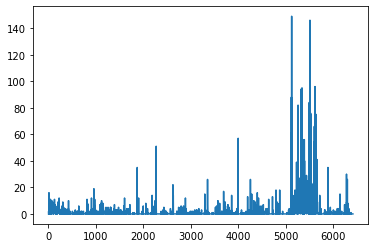

In [212]:
dataset["deaths_civilians"].plot()

In [213]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

<AxesSubplot:>

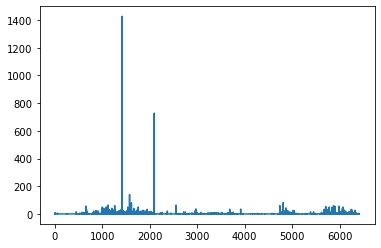

In [214]:
dataset["deaths_unknown"].plot()

<AxesSubplot:>

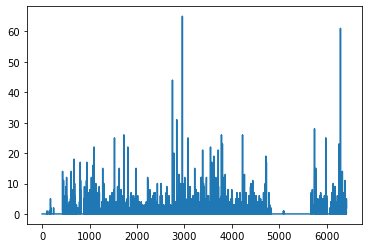

In [215]:
dataset["deaths_a"].plot()

<AxesSubplot:>

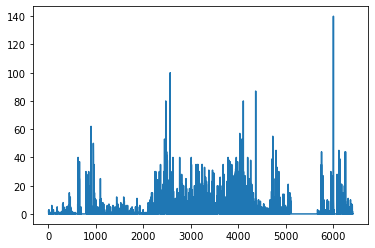

In [216]:
dataset["deaths_b"].plot()

In [217]:
dataset["Group_A"]

0            #group+name+first
1          Government of India
2          Government of India
3          Government of India
4          Government of India
                 ...          
6412    Government of Pakistan
6413    Government of Pakistan
6414    Government of Pakistan
6415    Government of Pakistan
6416    Government of Pakistan
Name: Group_A, Length: 6417, dtype: object

In [218]:
dataset["Group_B"]

0           #group+name+second
1       Government of Pakistan
2       Government of Pakistan
3       Government of Pakistan
4       Government of Pakistan
                 ...          
6412                      BRAS
6413                      BRAS
6414                      BRAS
6415                      BRAS
6416                      BRAS
Name: Group_B, Length: 6417, dtype: object

In [219]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [220]:
dataset["Group_A"].unique()

array(['#group+name+first', 'Government of India', 'Government of Iraq',
       'Government of Pakistan', 'Government of Afghanistan',
       'Government of Iran', 'Government of United States of America',
       'IS', 'BLA', 'Taleban', 'Jondullah', 'TTP', 'LeJ', 'al-Qaida',
       'Fedayeen Islam', 'Lashkar-e-Islam', 'TTP-Islahi', 'UBA',
       'Ansaar ul-Islam', 'Bangesh', 'IMU', 'Forces of Shah Sahib',
       'Kachai sub-tribe of Bangesh', 'Lashkar of Salarzai tribe',
       'Mangal', 'MQM', 'Lashkar of Orakzai tribe',
       'Forces of Turkestan Bhittani', 'Forces of Momin Afridi',
       'TTP - MR', 'Laskhar of Masozai Qaumi tribe',
       'Lashkar of Kukikhel clan', 'Mohajir', 'Jatoi',
       'Supporters of MQM', 'Khadadkhel',
       'Supporters of Yousaf Ali Khan Magsi', 'Lashkar of Mohmand tribe',
       'Government of China', 'TTP-KM', 'Jaish-ul-Islam'], dtype=object)

In [221]:
dataset["Group_B"].unique()

array(['#group+name+second', 'Government of Pakistan', 'IS', 'BLF', 'BLA',
       'Baloch Ittehad', 'BRA', 'Hizb-i Islami-yi Afghanistan', 'Taleban',
       'MEK', 'Jondullah', 'Kashmir insurgents', 'MQM', 'TTP', 'al-Qaida',
       'Civilians', 'Lashkar-e-Islam', 'Turi', 'Lashkhar of Wazir tribe',
       'Mishti', 'MQM-H', 'TTP - TA', 'TTP - MT', 'Mangal',
       'Lashkar of Zakakhel tribe', 'Lashkar of Akakhel tribe', 'IMU',
       'Pashtun', 'Sindhi', 'Meher', 'Supporters of PPP', 'Oatizai',
       'Supporters of Zulfikar Ali Khan Magsi', 'Tawheed ul-Islam', 'UBA',
       'ETIM', 'Jaish al-Adl', 'TTP-SM', 'Jamaat-ul-Ahrar',
       'High Council of Afghanistan Islamic Emirate', 'BRAS'],
      dtype=object)

In [222]:
dataset.corr()

,id,active_year,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,Group_A_dset_id,Group_A_new_id,Group_B_dset_id,...,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,high,low,gwnoa,gwnob
id,1.000000,0.009078,-0.149694,-0.058683,-0.051691,0.113225,0.108845,-0.093171,-0.093171,-0.002872,...,0.031235,0.021783,-0.049239,-0.035032,0.007485,-0.048773,-0.064452,-0.086200,-0.145384,NaN
active_year,0.009078,1.000000,-0.240612,-0.126581,-0.131061,-0.101961,-0.115282,-0.095424,-0.095424,-0.203190,...,-0.000120,-0.010708,0.019541,0.065994,-0.010545,0.013347,0.031974,0.047597,-0.036513,NaN
type_of_violence,-0.149694,-0.240612,1.000000,0.275028,0.292131,0.084916,0.142916,0.357463,0.357463,0.880689,...,0.003146,0.016810,-0.088734,-0.144657,0.318713,-0.007783,0.018244,0.045711,0.001563,NaN
conflict_dset_id,-0.058683,-0.126581,0.275028,1.000000,0.995212,0.636705,0.636835,0.656616,0.656616,0.013082,...,0.070970,0.053732,0.034585,-0.040331,-0.018591,0.032573,0.014084,0.034724,0.016361,NaN
conflict_new_id,-0.051691,-0.131061,0.292131,0.995212,1.000000,0.632723,0.639306,0.673889,0.673889,0.044076,...,0.068122,0.050100,0.031299,-0.043230,-0.004472,0.030205,0.013785,0.035099,0.016370,NaN
dyad_dset_id,0.113225,-0.101961,0.084916,0.636705,0.632723,1.000000,0.996521,0.408996,0.408996,0.110495,...,0.040876,0.032972,0.055409,-0.000566,-0.046864,0.015982,0.002951,0.017718,0.062371,NaN
dyad_new_id,0.108845,-0.115282,0.142916,0.636835,0.639306,0.996521,1.000000,0.433592,0.433592,0.171105,...,0.038972,0.031747,0.048783,-0.009031,-0.023491,0.014240,0.003727,0.020074,0.062382,NaN
Group_A_dset_id,-0.093171,-0.095424,0.357463,0.656616,0.673889,0.408996,0.433592,1.000000,1.000000,0.234923,...,0.041617,0.009695,-0.030504,-0.060472,0.056317,0.029142,0.012676,0.038681,0.999809,NaN
Group_A_new_id,-0.093171,-0.095424,0.357463,0.656616,0.673889,0.408996,0.433592,1.000000,1.000000,0.234923,...,0.041617,0.009695,-0.030504,-0.060472,0.056317,0.029142,0.012676,0.038681,0.999809,NaN
Group_B_dset_id,-0.002872,-0.203190,0.880689,0.013082,0.044076,0.110495,0.171105,0.234923,0.234923,1.000000,...,-0.025113,-0.012575,-0.090479,-0.143970,0.331752,-0.023974,0.005773,0.023266,-0.075975,NaN


In [223]:
dataset.dtypes

id                   float64
relid                 object
year                  object
active_year          float64
code_status           object
type_of_violence     float64
conflict_dset_id     float64
conflict_new_id      float64
conflict_name         object
dyad_dset_id         float64
dyad_new_id          float64
dyad_name             object
Group_A_dset_id      float64
Group_A_new_id       float64
Group_A               object
Group_B_dset_id      float64
Group_B_new_id       float64
Group_B               object
number_of_sources    float64
source_article        object
source_office         object
source_date           object
source_headline       object
source_original       object
where_prec           float64
where_coordinates     object
where_description     object
adm_1                 object
adm_2                 object
latitude              object
longitude             object
geom_wkt              object
priogrid_gid         float64
country               object
iso3          

In [224]:
dataset.dtypes

id                   float64
relid                 object
year                  object
active_year          float64
code_status           object
type_of_violence     float64
conflict_dset_id     float64
conflict_new_id      float64
conflict_name         object
dyad_dset_id         float64
dyad_new_id          float64
dyad_name             object
Group_A_dset_id      float64
Group_A_new_id       float64
Group_A               object
Group_B_dset_id      float64
Group_B_new_id       float64
Group_B               object
number_of_sources    float64
source_article        object
source_office         object
source_date           object
source_headline       object
source_original       object
where_prec           float64
where_coordinates     object
where_description     object
adm_1                 object
adm_2                 object
latitude              object
longitude             object
geom_wkt              object
priogrid_gid         float64
country               object
iso3          

In [225]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [226]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Group_A_code'] = le.fit_transform(dataset.Group_A)
dataset["Group_A_code"]

0        0
1       10
2       10
3       10
4       10
        ..
6412    13
6413    13
6414    13
6415    13
6416    13
Name: Group_A_code, Length: 6417, dtype: int32

In [227]:
le2 = LabelEncoder()
dataset['Group_B_code'] = le2.fit_transform(dataset.Group_B)
dataset["Group_B_code"]

0       0
1       8
2       8
3       8
4       8
       ..
6412    4
6413    4
6414    4
6415    4
6416    4
Name: Group_B_code, Length: 6417, dtype: int32

In [228]:
le3 = LabelEncoder()
dataset['conflict_name_code'] = le3.fit_transform(dataset.conflict_name)
dataset["conflict_name_code"]

0       57
1       18
2       18
3       18
4       18
        ..
6412    43
6413    43
6414    43
6415    43
6416    43
Name: conflict_name_code, Length: 6417, dtype: int32

In [229]:
le4 = LabelEncoder()
dataset['where_coordinates_code'] = le4.fit_transform(dataset.where_coordinates)
dataset["where_coordinates_code"]

0          0
1        499
2        945
3         57
4         57
        ... 
6412    1088
6413     996
6414    1090
6415     498
6416    1090
Name: where_coordinates_code, Length: 6417, dtype: int32

In [230]:
le5 = LabelEncoder()
dataset['active_year_code'] = le5.fit_transform(dataset.active_year)
dataset["active_year_code"]

0       2
1       1
2       1
3       1
4       1
       ..
6412    1
6413    1
6414    1
6415    1
6416    1
Name: active_year_code, Length: 6417, dtype: int64

In [231]:
le6 = LabelEncoder()
dataset['code_status_code'] = le6.fit_transform(dataset.code_status)
dataset["code_status_code"]

0       1
1       0
2       0
3       0
4       0
       ..
6412    0
6413    0
6414    0
6415    0
6416    0
Name: code_status_code, Length: 6417, dtype: int32

In [232]:
le7 = LabelEncoder()
dataset['year_code'] = le7.fit_transform(dataset.year)
dataset['year_code'].unique()

array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 16, 17, 18, 19, 20, 21,  4,  1])

In [233]:
dataset.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob', 'Group_A_code', 'Group_B_code', 'conflict_name_code',
       'where_coordinates_code', 'active_year_code', 'code_status_code',
       'year_code'],
      dtype='object')

In [234]:
y = dataset.iloc[:,-7]
y.head()

0     0
1    10
2    10
3    10
4    10
Name: Group_A_code, dtype: int32

In [235]:
X=dataset.iloc[:,-6:-1]
X.head()

,Group_B_code,conflict_name_code,where_coordinates_code,active_year_code,code_status_code
0,0,57,0,2,1
1,8,18,499,1,0
2,8,18,945,1,0
3,8,18,57,1,0
4,8,18,57,1,0


In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)
y_test.shape
from sklearn.metrics import accuracy_score

In [237]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)
y_predict=knnmodel.predict(X_test)

In [238]:
from sklearn.metrics import accuracy_score

In [239]:
acc=accuracy_score(y_test,y_predict)
acc

0.9476635514018692

In [240]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, y_predict)
cm

array([[   7,    2,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   10,    0,    0,    0,    0,    0,    4,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   13,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

In [241]:
cm1=pd.DataFrame(data=cm,index=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29'], columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29'])
cm1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,7,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,0,2,0,0,0,17,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,114,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1109,...,1,0,0,1,0,9,0,0,0,0


In [242]:
dataset["deaths_civilians"].argmax()

5125

In [243]:
dataset.iloc[5125:]

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,low,gwnoa,gwnob,Group_A_code,Group_B_code,conflict_name_code,where_coordinates_code,active_year_code,code_status_code,year_code
5125,274819.0,AFG-2018-3-973-194,2018,1.0,Clear,3.0,234.0,506.0,IS - Civilians,234.0,...,149.0,NaN,NaN,16,6,16,701,1,0,30
5126,275124.0,AFG-2018-3-973-198,2018,1.0,Clear,3.0,234.0,506.0,IS - Civilians,234.0,...,2.0,NaN,NaN,16,6,16,855,1,0,30
5127,275159.0,AFG-2018-3-973-199,2018,1.0,Clear,3.0,234.0,506.0,IS - Civilians,234.0,...,35.0,NaN,NaN,16,6,16,455,1,0,30
5128,364671.0,AFG-2020-3-973-226,2020,1.0,Clear,3.0,234.0,506.0,IS - Civilians,234.0,...,0.0,NaN,NaN,16,6,16,259,1,0,32
5129,374523.0,AFG-2021-3-973-14,2021,1.0,Clear,3.0,234.0,506.0,IS - Civilians,234.0,...,11.0,NaN,NaN,16,6,16,640,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,425040.0,PAK-2021-1-16177-46,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,1088,1,0,33
6413,425056.0,PAK-2021-1-16177-47,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,5.0,770.0,NaN,13,4,43,996,1,0,33
6414,425057.0,PAK-2021-1-16177-48,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,4.0,770.0,NaN,13,4,43,1090,1,0,33
6415,425076.0,PAK-2021-1-16177-49,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,498,1,0,33


In [244]:
dataset["gwnoa"].unique()

array([ nan, 750., 645., 770., 700., 630.,   2., 710.])

In [245]:
dataset

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,low,gwnoa,gwnob,Group_A_code,Group_B_code,conflict_name_code,where_coordinates_code,active_year_code,code_status_code,year_code
0,NaN,NaN,#date+year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,57,0,2,1,0
1,59553.0,PAK-1990-1-345-5,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,2.0,750.0,770.0,10,8,18,499,1,0,2
2,372969.0,IND-1990-1-422-1,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1.0,750.0,770.0,10,8,18,945,1,0,2
3,51736.0,PAK-1991-1-345-5,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,2.0,750.0,770.0,10,8,18,57,1,0,3
4,372974.0,IND-1991-1-422-0,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1.0,750.0,770.0,10,8,18,57,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,425040.0,PAK-2021-1-16177-46,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,1088,1,0,33
6413,425056.0,PAK-2021-1-16177-47,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,5.0,770.0,NaN,13,4,43,996,1,0,33
6414,425057.0,PAK-2021-1-16177-48,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,4.0,770.0,NaN,13,4,43,1090,1,0,33
6415,425076.0,PAK-2021-1-16177-49,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,498,1,0,33


In [246]:
columns = dataset.columns

In [247]:
columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob', 'Group_A_code', 'Group_B_code', 'conflict_name_code',
       'where_coordinates_code', 'active_year_code', 'code_status_code',
       'year_code'],
      dtype='object')

In [248]:
for column in columns:
    print("Column name = ", column)
    print("unique values in each column = ", dataset[column].unique)

Column name =  id
unique values in each column =  <bound method Series.unique of 0            NaN
1        59553.0
2       372969.0
3        51736.0
4       372974.0
          ...   
6412    425040.0
6413    425056.0
6414    425057.0
6415    425076.0
6416    425083.0
Name: id, Length: 6417, dtype: float64>
Column name =  relid
unique values in each column =  <bound method Series.unique of 0                       NaN
1          PAK-1990-1-345-5
2          IND-1990-1-422-1
3          PAK-1991-1-345-5
4          IND-1991-1-422-0
               ...         
6412    PAK-2021-1-16177-46
6413    PAK-2021-1-16177-47
6414    PAK-2021-1-16177-48
6415    PAK-2021-1-16177-49
6416    PAK-2021-1-16177-52
Name: relid, Length: 6417, dtype: object>
Column name =  year
unique values in each column =  <bound method Series.unique of 0       #date+year
1             1990
2             1990
3             1991
4             1991
           ...    
6412          2021
6413          2021
6414          2021
6415

In [249]:
dataset.isnull()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,low,gwnoa,gwnob,Group_A_code,Group_B_code,conflict_name_code,where_coordinates_code,active_year_code,code_status_code,year_code
0,True,True,False,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6413,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6414,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6415,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [250]:
dataset.drop(index=dataset.index[0], axis=0, inplace=True)

In [251]:
dataset

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,low,gwnoa,gwnob,Group_A_code,Group_B_code,conflict_name_code,where_coordinates_code,active_year_code,code_status_code,year_code
1,59553.0,PAK-1990-1-345-5,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,2.0,750.0,770.0,10,8,18,499,1,0,2
2,372969.0,IND-1990-1-422-1,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1.0,750.0,770.0,10,8,18,945,1,0,2
3,51736.0,PAK-1991-1-345-5,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,2.0,750.0,770.0,10,8,18,57,1,0,3
4,372974.0,IND-1991-1-422-0,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1.0,750.0,770.0,10,8,18,57,1,0,3
5,59651.0,PAK-1991-1-345-7,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,4.0,750.0,770.0,10,8,18,57,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,425040.0,PAK-2021-1-16177-46,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,1088,1,0,33
6413,425056.0,PAK-2021-1-16177-47,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,5.0,770.0,NaN,13,4,43,996,1,0,33
6414,425057.0,PAK-2021-1-16177-48,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,4.0,770.0,NaN,13,4,43,1090,1,0,33
6415,425076.0,PAK-2021-1-16177-49,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,498,1,0,33


In [252]:
a= dataset.isnull()

In [253]:
df = pd.DataFrame(a)

In [254]:
df

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,low,gwnoa,gwnob,Group_A_code,Group_B_code,conflict_name_code,where_coordinates_code,active_year_code,code_status_code,year_code
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6413,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6414,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6415,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [255]:
count = 1
for column in columns:
    if df[column].unique == True:
        print(df[column])
    else:
        print(count)
        count= count+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


In [256]:
df2 = dataset 

In [257]:
df2

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,low,gwnoa,gwnob,Group_A_code,Group_B_code,conflict_name_code,where_coordinates_code,active_year_code,code_status_code,year_code
1,59553.0,PAK-1990-1-345-5,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,2.0,750.0,770.0,10,8,18,499,1,0,2
2,372969.0,IND-1990-1-422-1,1990,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1.0,750.0,770.0,10,8,18,945,1,0,2
3,51736.0,PAK-1991-1-345-5,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,2.0,750.0,770.0,10,8,18,57,1,0,3
4,372974.0,IND-1991-1-422-0,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,1.0,750.0,770.0,10,8,18,57,1,0,3
5,59651.0,PAK-1991-1-345-7,1991,1.0,Clear,1.0,218.0,218.0,India - Pakistan,422.0,...,4.0,750.0,770.0,10,8,18,57,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,425040.0,PAK-2021-1-16177-46,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,1088,1,0,33
6413,425056.0,PAK-2021-1-16177-47,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,5.0,770.0,NaN,13,4,43,996,1,0,33
6414,425057.0,PAK-2021-1-16177-48,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,4.0,770.0,NaN,13,4,43,1090,1,0,33
6415,425076.0,PAK-2021-1-16177-49,2021,1.0,Clear,1.0,325.0,325.0,Pakistan: Balochistan,16177.0,...,0.0,770.0,NaN,13,4,43,498,1,0,33


In [258]:
df2.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'Group_A_dset_id', 'Group_A_new_id',
       'Group_A', 'Group_B_dset_id', 'Group_B_new_id', 'Group_B',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'iso3', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob', 'Group_A_code', 'Group_B_code', 'conflict_name_code',
       'where_coordinates_code', 'active_year_code', 'code_status_code',
       'year_code'],
      dtype='object')

In [259]:
dataset["high"]

1        2.0
2        1.0
3        2.0
4        1.0
5        4.0
        ... 
6412    11.0
6413     5.0
6414     4.0
6415     2.0
6416     2.0
Name: high, Length: 6416, dtype: float64

In [260]:
dataset['low']

1       2.0
2       1.0
3       2.0
4       1.0
5       4.0
       ... 
6412    0.0
6413    5.0
6414    4.0
6415    0.0
6416    0.0
Name: low, Length: 6416, dtype: float64

In [261]:
dataset["type_of_violence"].unique()

array([1., 3., 2.])

In [262]:
dataset["longitude"]

1       74.355544
2       73.889049
3       73.897240
4       73.897240
5       73.897240
          ...    
6412    62.372746
6413    68.015519
6414    63.060556
6415    63.110307
6416    63.060556
Name: longitude, Length: 6416, dtype: object

In [263]:
dataset["latitude"]

1       34.821865
2       34.567086
3       34.571730
4       34.571730
5       34.571730
          ...    
6412    26.097295
6413    29.840645
6414    26.004167
6415    26.017915
6416    26.004167
Name: latitude, Length: 6416, dtype: object

In [264]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 1 to 6416
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6416 non-null   float64
 1   relid                   6416 non-null   object 
 2   year                    6416 non-null   object 
 3   active_year             6416 non-null   float64
 4   code_status             6416 non-null   object 
 5   type_of_violence        6416 non-null   float64
 6   conflict_dset_id        6416 non-null   float64
 7   conflict_new_id         6416 non-null   float64
 8   conflict_name           6416 non-null   object 
 9   dyad_dset_id            6416 non-null   float64
 10  dyad_new_id             6416 non-null   float64
 11  dyad_name               6416 non-null   object 
 12  Group_A_dset_id         6416 non-null   float64
 13  Group_A_new_id          6416 non-null   float64
 14  Group_A                 6416 non-null   

In [265]:
columnsDf = pd.DataFrame(columns)

columnsDf.rename(columns = {0:'Column_names'}, inplace = True)

In [266]:
columnsDf

,Column_names
0,id
1,relid
2,year
3,active_year
4,code_status
5,type_of_violence
6,conflict_dset_id
7,conflict_new_id
8,conflict_name
9,dyad_dset_id


In [267]:
df2.dtypes

id                        float64
relid                      object
year                       object
active_year               float64
code_status                object
type_of_violence          float64
conflict_dset_id          float64
conflict_new_id           float64
conflict_name              object
dyad_dset_id              float64
dyad_new_id               float64
dyad_name                  object
Group_A_dset_id           float64
Group_A_new_id            float64
Group_A                    object
Group_B_dset_id           float64
Group_B_new_id            float64
Group_B                    object
number_of_sources         float64
source_article             object
source_office              object
source_date                object
source_headline            object
source_original            object
where_prec                float64
where_coordinates          object
where_description          object
adm_1                      object
adm_2                      object
latitude      

In [268]:
dataset['Group_A_code'].fillna(int(df['Group_A_code'].mean()), inplace=True)

In [269]:
dataset['Group_B_code'].fillna(int(df['Group_B_code'].mean()), inplace=True)

In [270]:
dataset['conflict_name_code'].fillna(int(df['conflict_name_code'].mean()), inplace=True)

In [271]:
dataset['where_coordinates_code'].fillna(int(df['where_coordinates_code'].mean()), inplace=True)

In [272]:
dataset['active_year_code'].fillna(int(df['active_year_code'].mean()), inplace=True)

In [273]:
dataset['code_status_code'].fillna(int(df['code_status_code'].mean()), inplace=True)

In [274]:
dataset['year_code'].fillna(int(df['year_code'].mean()), inplace=True)

In [275]:
dataset['longitude'].fillna(int(df['longitude'].mean()), inplace=True)

In [276]:
dataset['latitude'].fillna(int(df['latitude'].mean()), inplace=True)

In [277]:
dataset['deaths_a'].fillna(int(df['deaths_a'].mean()), inplace=True)

In [278]:
dataset['deaths_b'].fillna(int(df['deaths_b'].mean()), inplace=True)

In [279]:
dataset['deaths_civilians'].fillna(int(df['deaths_civilians'].mean()), inplace=True)

In [280]:
dataset['deaths_unknown'].fillna(int(df['deaths_unknown'].mean()), inplace=True)

In [281]:
dataset.dtypes

id                        float64
relid                      object
year                       object
active_year               float64
code_status                object
type_of_violence          float64
conflict_dset_id          float64
conflict_new_id           float64
conflict_name              object
dyad_dset_id              float64
dyad_new_id               float64
dyad_name                  object
Group_A_dset_id           float64
Group_A_new_id            float64
Group_A                    object
Group_B_dset_id           float64
Group_B_new_id            float64
Group_B                    object
number_of_sources         float64
source_article             object
source_office              object
source_date                object
source_headline            object
source_original            object
where_prec                float64
where_coordinates          object
where_description          object
adm_1                      object
adm_2                      object
latitude      

In [282]:
dataset = dataset.iloc[:, [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-14,-15,-16,-19,-20, 3 ,5 ,6 ,7 ,9 ,10, 1,2 ,13, 15, 16, 18]]

In [283]:
dataset

,year_code,code_status_code,active_year_code,where_coordinates_code,conflict_name_code,Group_B_code,Group_A_code,gwnob,gwnoa,low,...,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,relid,year,Group_A_new_id,Group_B_dset_id,Group_B_new_id,number_of_sources
1,2,0,1,499,18,8,10,770.0,750.0,2.0,...,218.0,218.0,422.0,422.0,PAK-1990-1-345-5,1990,141.0,142.0,142.0,-1.0
2,2,0,1,945,18,8,10,770.0,750.0,1.0,...,218.0,218.0,422.0,422.0,IND-1990-1-422-1,1990,141.0,142.0,142.0,1.0
3,3,0,1,57,18,8,10,770.0,750.0,2.0,...,218.0,218.0,422.0,422.0,PAK-1991-1-345-5,1991,141.0,142.0,142.0,-1.0
4,3,0,1,57,18,8,10,770.0,750.0,1.0,...,218.0,218.0,422.0,422.0,IND-1991-1-422-0,1991,141.0,142.0,142.0,1.0
5,3,0,1,57,18,8,10,770.0,750.0,4.0,...,218.0,218.0,422.0,422.0,PAK-1991-1-345-7,1991,141.0,142.0,142.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,33,0,1,1088,43,4,13,NaN,770.0,0.0,...,325.0,325.0,16177.0,16177.0,PAK-2021-1-16177-46,2021,142.0,7542.0,7542.0,2.0
6413,33,0,1,996,43,4,13,NaN,770.0,5.0,...,325.0,325.0,16177.0,16177.0,PAK-2021-1-16177-47,2021,142.0,7542.0,7542.0,2.0
6414,33,0,1,1090,43,4,13,NaN,770.0,4.0,...,325.0,325.0,16177.0,16177.0,PAK-2021-1-16177-48,2021,142.0,7542.0,7542.0,2.0
6415,33,0,1,498,43,4,13,NaN,770.0,0.0,...,325.0,325.0,16177.0,16177.0,PAK-2021-1-16177-49,2021,142.0,7542.0,7542.0,3.0


In [284]:
dataset.dtypes

year_code                   int32
code_status_code            int32
active_year_code            int64
where_coordinates_code      int32
conflict_name_code          int32
Group_B_code                int32
Group_A_code                int32
gwnob                     float64
gwnoa                     float64
low                       float64
high                      float64
best                       object
deaths_civilians          float64
deaths_b                  float64
deaths_a                  float64
date_prec                 float64
event_clarity             float64
active_year               float64
type_of_violence          float64
conflict_dset_id          float64
conflict_new_id           float64
dyad_dset_id              float64
dyad_new_id               float64
relid                      object
year                       object
Group_A_new_id            float64
Group_B_dset_id           float64
Group_B_new_id            float64
number_of_sources         float64
dtype: object

In [285]:
dataset = dataset.drop(['best', 'relid'], axis=1)

In [286]:
dataset

,year_code,code_status_code,active_year_code,where_coordinates_code,conflict_name_code,Group_B_code,Group_A_code,gwnob,gwnoa,low,...,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,year,Group_A_new_id,Group_B_dset_id,Group_B_new_id,number_of_sources
1,2,0,1,499,18,8,10,770.0,750.0,2.0,...,1.0,218.0,218.0,422.0,422.0,1990,141.0,142.0,142.0,-1.0
2,2,0,1,945,18,8,10,770.0,750.0,1.0,...,1.0,218.0,218.0,422.0,422.0,1990,141.0,142.0,142.0,1.0
3,3,0,1,57,18,8,10,770.0,750.0,2.0,...,1.0,218.0,218.0,422.0,422.0,1991,141.0,142.0,142.0,-1.0
4,3,0,1,57,18,8,10,770.0,750.0,1.0,...,1.0,218.0,218.0,422.0,422.0,1991,141.0,142.0,142.0,1.0
5,3,0,1,57,18,8,10,770.0,750.0,4.0,...,1.0,218.0,218.0,422.0,422.0,1991,141.0,142.0,142.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,33,0,1,1088,43,4,13,NaN,770.0,0.0,...,1.0,325.0,325.0,16177.0,16177.0,2021,142.0,7542.0,7542.0,2.0
6413,33,0,1,996,43,4,13,NaN,770.0,5.0,...,1.0,325.0,325.0,16177.0,16177.0,2021,142.0,7542.0,7542.0,2.0
6414,33,0,1,1090,43,4,13,NaN,770.0,4.0,...,1.0,325.0,325.0,16177.0,16177.0,2021,142.0,7542.0,7542.0,2.0
6415,33,0,1,498,43,4,13,NaN,770.0,0.0,...,1.0,325.0,325.0,16177.0,16177.0,2021,142.0,7542.0,7542.0,3.0


In [287]:
dataset.dtypes

year_code                   int32
code_status_code            int32
active_year_code            int64
where_coordinates_code      int32
conflict_name_code          int32
Group_B_code                int32
Group_A_code                int32
gwnob                     float64
gwnoa                     float64
low                       float64
high                      float64
deaths_civilians          float64
deaths_b                  float64
deaths_a                  float64
date_prec                 float64
event_clarity             float64
active_year               float64
type_of_violence          float64
conflict_dset_id          float64
conflict_new_id           float64
dyad_dset_id              float64
dyad_new_id               float64
year                       object
Group_A_new_id            float64
Group_B_dset_id           float64
Group_B_new_id            float64
number_of_sources         float64
dtype: object

In [288]:
dataset['year'].unique()

array(['1990', '1991', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2004', '2005', '2006', '2007', '2008', '2009', '1992',
       '1989'], dtype=object)

In [289]:
dataset = dataset.astype({'year':'int'})

In [290]:
dataset.dtypes

year_code                   int32
code_status_code            int32
active_year_code            int64
where_coordinates_code      int32
conflict_name_code          int32
Group_B_code                int32
Group_A_code                int32
gwnob                     float64
gwnoa                     float64
low                       float64
high                      float64
deaths_civilians          float64
deaths_b                  float64
deaths_a                  float64
date_prec                 float64
event_clarity             float64
active_year               float64
type_of_violence          float64
conflict_dset_id          float64
conflict_new_id           float64
dyad_dset_id              float64
dyad_new_id               float64
year                        int32
Group_A_new_id            float64
Group_B_dset_id           float64
Group_B_new_id            float64
number_of_sources         float64
dtype: object

In [291]:
columnV = ["code_status_code", "active_year_code","where_coordinates_code", "conflict_name_code", "Group_A_code", "Group_B_code"]
columnV2 = ["gwnob", "gwnoa", "low","high","deaths_civilians","deaths_b","deaths_a"]
columnV3 = ["date_prec","event_clarity","active_year","type_of_violence","conflict_dset_id","conflict_new_id","dyad_dset_id"]
columnV4 = ["year","Group_A_new_id","Group_B_dset_id","Group_B_new_id","number_of_sources"]

In [292]:
df2["conflict_name"].unique()

array(['India - Pakistan', 'Iraq: Government', 'Pakistan: Balochistan',
       'Afghanistan: Government', 'Iran: Government', 'India: Kashmir',
       'Pakistan: Government', 'United States of America: Government',
       'Government of Afghanistan - Civilians',
       'Government of India - Civilians', 'IS - Civilians',
       'BLA - Civilians', 'Taleban - Civilians', 'Jondullah - Civilians',
       'TTP - Civilians', 'LeJ - Civilians', 'al-Qaida  - Civilians',
       'Fedayeen Islam - Civilians', 'Lashkar-e-Islam - Civilians',
       'TTP-Islahi - Civilians', 'UBA - Civilians',
       'Ansaar ul-Islam - Lashkar-e-Islam', 'Bangesh - Turi',
       'IMU - Lashkhar of Wazir tribe', 'Forces of Shah Sahib - TTP',
       'Kachai sub-tribe of Bangesh - Mishti',
       'Lashkar of Salarzai tribe - TTP', 'Mangal - Turi', 'MQM - MQM-H',
       'Lashkar of Orakzai tribe - TTP',
       'Forces of Turkestan Bhittani - TTP', 'Lashkar-e-Islam - TTP',
       'Forces of Momin Afridi - TTP - TA', 'TTP 

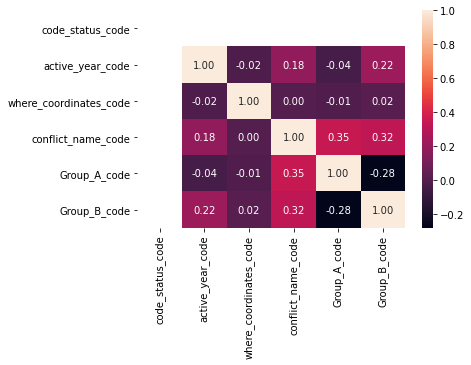

In [293]:
sns.heatmap(dataset[columnV].corr(), annot = True, fmt = '.2f')
plt.show()

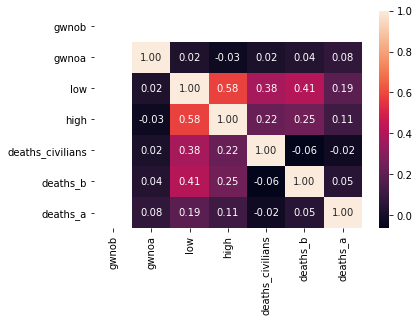

In [294]:
sns.heatmap(dataset[columnV2].corr(), annot = True, fmt = '.2f')
plt.show()

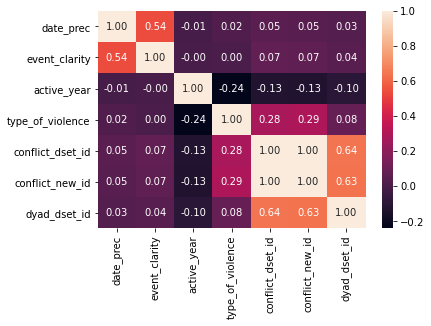

In [295]:
sns.heatmap(dataset[columnV3].corr(), annot = True, fmt = '.2f')
plt.show()

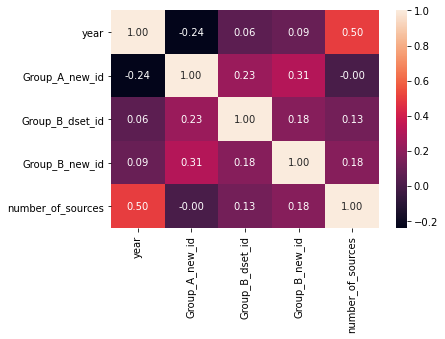

In [296]:
sns.heatmap(dataset[columnV4].corr(), annot = True, fmt = '.2f')
plt.show()

In [297]:
dataset["deaths_civilians"].max()

149.0

C:\Users\coold\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\coold\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\coold\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\coold\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\coold\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\coold\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping densit

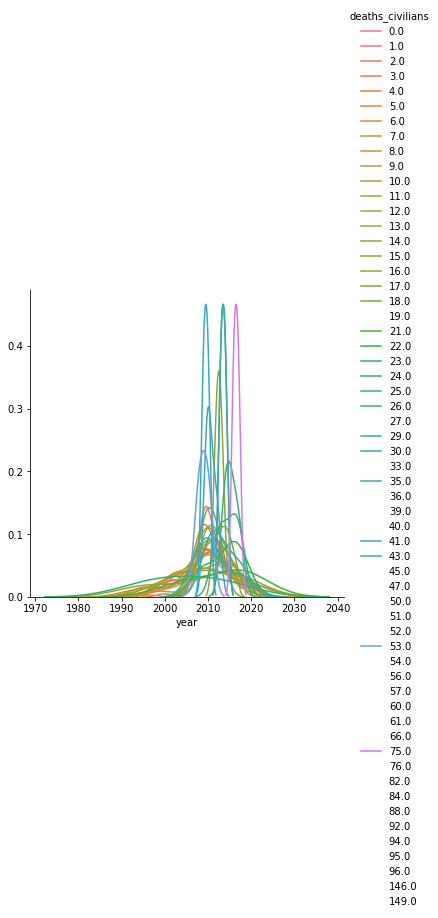

In [298]:
sns.FacetGrid(dataset, hue="deaths_civilians", size=5) \
    .map(sns.kdeplot, "year") \
    .add_legend()

In [299]:
dataset['type_of_violence'].unique()

array([1., 3., 2.])

In [300]:
dataset.columns

Index(['year_code', 'code_status_code', 'active_year_code',
       'where_coordinates_code', 'conflict_name_code', 'Group_B_code',
       'Group_A_code', 'gwnob', 'gwnoa', 'low', 'high', 'deaths_civilians',
       'deaths_b', 'deaths_a', 'date_prec', 'event_clarity', 'active_year',
       'type_of_violence', 'conflict_dset_id', 'conflict_new_id',
       'dyad_dset_id', 'dyad_new_id', 'year', 'Group_A_new_id',
       'Group_B_dset_id', 'Group_B_new_id', 'number_of_sources'],
      dtype='object')

In [301]:
dataset['gwnob'].fillna(int(df['gwnob'].mean()), inplace=True)

In [302]:
dataset['gwnoa'].fillna(int(df['gwnoa'].mean()), inplace=True)

In [303]:
dataset['low'].fillna(int(df['low'].mean()), inplace=True)

In [304]:
dataset['high'].fillna(int(df['high'].mean()), inplace=True)

In [305]:
dataset['date_prec'].fillna(int(df['date_prec'].mean()), inplace=True)

In [306]:
dataset['event_clarity'].fillna(int(df['event_clarity'].mean()), inplace=True)

In [307]:
lits = ['active_year',
       'type_of_violence', 'conflict_dset_id', 'conflict_new_id',
       'dyad_dset_id', 'dyad_new_id', 'year', 'Group_A_new_id',
       'Group_B_dset_id', 'Group_B_new_id', 'number_of_sources']
for lit in lits:
    dataset[lit].fillna(int(df[lit].mean()), inplace=True)

In [308]:
df2["conflict_name"].unique()

array(['India - Pakistan', 'Iraq: Government', 'Pakistan: Balochistan',
       'Afghanistan: Government', 'Iran: Government', 'India: Kashmir',
       'Pakistan: Government', 'United States of America: Government',
       'Government of Afghanistan - Civilians',
       'Government of India - Civilians', 'IS - Civilians',
       'BLA - Civilians', 'Taleban - Civilians', 'Jondullah - Civilians',
       'TTP - Civilians', 'LeJ - Civilians', 'al-Qaida  - Civilians',
       'Fedayeen Islam - Civilians', 'Lashkar-e-Islam - Civilians',
       'TTP-Islahi - Civilians', 'UBA - Civilians',
       'Ansaar ul-Islam - Lashkar-e-Islam', 'Bangesh - Turi',
       'IMU - Lashkhar of Wazir tribe', 'Forces of Shah Sahib - TTP',
       'Kachai sub-tribe of Bangesh - Mishti',
       'Lashkar of Salarzai tribe - TTP', 'Mangal - Turi', 'MQM - MQM-H',
       'Lashkar of Orakzai tribe - TTP',
       'Forces of Turkestan Bhittani - TTP', 'Lashkar-e-Islam - TTP',
       'Forces of Momin Afridi - TTP - TA', 'TTP 

In [309]:
dataset["conflict_name_code"].unique()

array([18, 21, 43,  0, 20, 19, 44, 55, 13, 14, 16,  4, 52, 24, 48, 38, 56,
        9, 31, 50, 54,  2,  7, 15, 11, 25, 30, 40, 39, 29, 12, 34, 10, 49,
        6, 33, 35, 37, 27, 32, 41, 42, 23, 46, 26, 47, 28, 36,  8,  3, 51,
       22, 45,  1, 17, 53,  5])

In [310]:
dataset = dataset.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 19,20,21,22,23,24,25,26,4,]]

In [311]:
dataset.columns

Index(['year_code', 'code_status_code', 'active_year_code',
       'where_coordinates_code', 'Group_B_code', 'Group_A_code', 'gwnob',
       'gwnoa', 'low', 'high', 'deaths_civilians', 'deaths_b', 'deaths_a',
       'date_prec', 'event_clarity', 'active_year', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'dyad_dset_id', 'dyad_new_id',
       'year', 'Group_A_new_id', 'Group_B_dset_id', 'Group_B_new_id',
       'number_of_sources', 'conflict_name_code'],
      dtype='object')

In [312]:
X=dataset.iloc[:,0:15]

In [313]:
X.head()

,year_code,code_status_code,active_year_code,where_coordinates_code,Group_B_code,Group_A_code,gwnob,gwnoa,low,high,deaths_civilians,deaths_b,deaths_a,date_prec,event_clarity
1,2,0,1,499,8,10,770.0,750.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0
2,2,0,1,945,8,10,770.0,750.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,3,0,1,57,8,10,770.0,750.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0
4,3,0,1,57,8,10,770.0,750.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
5,3,0,1,57,8,10,770.0,750.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0


In [314]:
y = dataset.iloc[:,-1]

In [315]:
y

1       18
2       18
3       18
4       18
5       18
        ..
6412    43
6413    43
6414    43
6415    43
6416    43
Name: conflict_name_code, Length: 6416, dtype: int32

In [316]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=123) # 70% training and 30% test

In [317]:
#checking the best value of K from 1 to 20 iteratively 
from sklearn.metrics import accuracy_score
ks=20
n = 3
mean_acc = np.zeros((ks-3))
for n in range (3,ks):
    neigh= KNeighborsClassifier (n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-3]=accuracy_score(y_test,yhat)

In [318]:
print(mean_acc)

[0.9387013  0.93766234 0.93246753 0.92935065 0.92415584 0.9225974
 0.91636364 0.91532468 0.91532468 0.91168831 0.91012987 0.90649351
 0.90233766 0.89974026 0.8961039  0.89506494 0.89298701]


In [319]:
#Max Accuracy from k= 1 to k = 20 index
mean_acc.argmax()

0

In [320]:
#printing the best accuracy with the value of K 
Kindx= mean_acc.argmax()
Kindx = Kindx+3
("Best accuracy was recorded with", mean_acc.max(), " where k= ", Kindx)

('Best accuracy was recorded with', 0.9387012987012987, ' where k= ', 3)

In [321]:
knn_acc = mean_acc.max()
print(knn_acc)

0.9387012987012987


In [322]:
#Finding the worst accuracy 
print(mean_acc.argmin())
kindxmin = mean_acc.argmin()
kindxmin = kindxmin + 2
kindxmin

16


18

In [323]:
#Printing the worst accuracy with the value of K 
("worst accuracy was recorded with", mean_acc.min(), " where k= ", kindxmin)

('worst accuracy was recorded with', 0.892987012987013, ' where k= ', 18)

<function matplotlib.pyplot.show(close=None, block=None)>

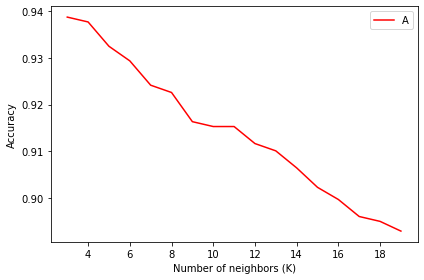

In [324]:
#accuracy graph with change in the value of K
plt.plot(range(3,ks),mean_acc, 'r')
plt.legend(("Accuracy"))
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors (K)")
plt.tight_layout()
plt.show

In [325]:
#F1_score 
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='macro')

0.20290453986322413

In [326]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat, labels=[1, 2, 3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.40      0.25      0.31         8
           3       0.00      0.00      0.00         1
           4       0.80      0.50      0.62        16

   micro avg       0.67      0.40      0.50        25
   macro avg       0.30      0.19      0.23        25
weighted avg       0.64      0.40      0.49        25



C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [327]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [328]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
svm_acc= metrics.accuracy_score(y_test, y_pred)
print(svm_acc)

0.9812987012987013


In [329]:
# F1_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.6658406617185552

In [330]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1, 2, 3,4]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         8
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        16

   micro avg       0.96      1.00      0.98        25
   macro avg       0.62      0.75      0.67        25
weighted avg       0.98      1.00      0.99        25



C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [331]:
# Import logistic regression model 
from sklearn.linear_model import LogisticRegression

In [332]:
logreg = LogisticRegression()

In [333]:
logreg.fit(X_train, y_train)

C:\Users\coold\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [334]:
y_pred = logreg.predict(X_test)

In [335]:
#Testing the accuracy 
LR_acc=accuracy_score(y_test,y_pred)
LR_acc

0.8815584415584415

In [336]:
#F1_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.13555187432707716

In [337]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           4       0.68      0.94      0.79        16
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         7
          18       1.00      1.00      1.00       131
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00    

C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature: 0, Score: 0.01104
Feature: 1, Score: 0.02705
Feature: 2, Score: 0.00200
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.04942
Feature: 5, Score: 0.11136
Feature: 6, Score: 0.34213
Feature: 7, Score: 0.07209
Feature: 8, Score: 0.02383
Feature: 9, Score: 0.00390
Feature: 10, Score: 0.18413
Feature: 11, Score: 0.03435
Feature: 12, Score: 0.02801
Feature: 13, Score: 0.10551
Feature: 14, Score: 0.00517


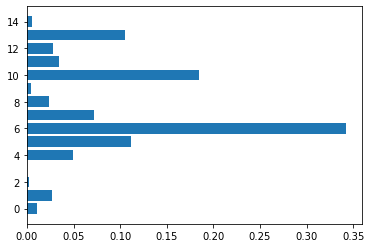

In [338]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.15030
Feature: 1, Score: 0.09046
Feature: 2, Score: 0.04084
Feature: 3, Score: 0.07140
Feature: 4, Score: 0.07124
Feature: 5, Score: 0.05006
Feature: 6, Score: 0.01799
Feature: 7, Score: 0.11543
Feature: 8, Score: 0.02174
Feature: 9, Score: 0.10850
Feature: 10, Score: 0.02339
Feature: 11, Score: 0.17175
Feature: 12, Score: 0.06689


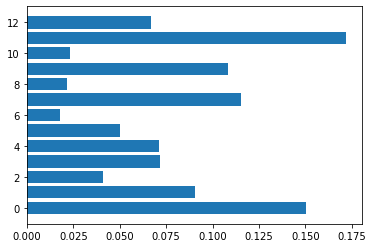

In [339]:
X, y = make_classification(n_samples=1000, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

In [340]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(
    max_depth=20, criterion='gini', random_state=200)
clf_dt.fit(X_train, y_train)
dt_pred = clf_dt.predict(X_test)

In [341]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test,dt_pred)
print("Accuracy: {}".format(accuracy_dt))
dt_acc = accuracy_dt
print(dt_acc)

Accuracy: 0.9958441558441559
0.9958441558441559


In [342]:
from sklearn.metrics import precision_score
precision_dt=precision_score(y_test,dt_pred, average = 'macro')
print("Precision: {}".format(precision_dt))

Precision: 0.7921930677032718


C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [343]:
from sklearn.metrics import recall_score
recall_dt = recall_score(y_test,dt_pred,average = 'macro')
print("Recall: {}".format(recall_dt))

Recall: 0.8061224489795918


C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [344]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           2       1.00      1.00      1.00         8
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        16
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        12
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.89      1.00      0.94         8
          16       1.00      1.00      1.00         7
          18       1.00      1.00      1.00       131
          19       1.00      1.00      1.00         1
          20       0.00    

C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [345]:
y.min()

0

In [346]:
#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True,feature_names = cc ,class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('CrimeAnalysis.png')
#Image(graph.create_png())

In [347]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred2=clf.predict(X_test)
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            #max_depth=None, max_features='auto', max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=1, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            #oob_score=False, random_state=None, verbose=0,
            #warm_start=False)

In [348]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
RF_acc= metrics.accuracy_score(y_test, y_pred2)
print(RF_acc)
Acc_RF = RF_acc

0.9849350649350649


In [357]:
from sklearn.ensemble import GradientBoostingClassifier
# test the accuracy of Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
gbc_acc =accuracy_score(y_pred, y_test)
print(gbc_acc)

0.9911688311688311


In [358]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        16
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         4
           7       0.92      1.00      0.96        12
           8       0.00      0.00      0.00         0
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         8
          16       1.00      0.71      0.83         7
          18       1.00      1.00      1.00       131
          19       0.00      0.00      0.00         1
          20       0.50    

C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\coold\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [359]:
scaler = MinMaxScaler()

In [360]:
dtc = DecisionTreeClassifier()
training_start = time.perf_counter()
dtc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = dtc.predict(X_test)
prediction_end = time.perf_counter()
acc_dtc = (preds == y_test).sum().astype(float) / len(preds)*100
dtc_train_time = training_end-training_start
dtc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Decision Tree Classifier's prediction accuracy is: %3.2f" % (acc_dtc))
print("Time consumed for training: %4.3f seconds" % (dtc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dtc_prediction_time))

Scikit-Learn's Decision Tree Classifier's prediction accuracy is: 99.69
Time consumed for training: 0.012 seconds
Time consumed for prediction: 0.00232 seconds


In [361]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 97.77
Time consumed for training: 0.121 seconds
Time consumed for prediction: 0.02477 seconds


In [362]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

C:\Users\coold\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Scores: [0.97555556 0.98663697 0.9844098  0.99331849 0.98663697 0.98663697
 0.98886414 0.99109131 0.97995546 0.98663697]
Mean: 0.9859742637960901
Standard Deviation: 0.004872914824049988


In [363]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Score': [accuracy_dt, Acc_RF],
    'Runtime Training': [ dtc_train_time, rfc_train_time],
    'Runtime Prediction': [dtc_prediction_time, rfc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
Decision Tree,0.995844,0.011830,0.002322
Random Forest,0.984935,0.120822,0.024768


In [364]:
results_acc = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'LR', 'Decision Tree', 'Random Forest','Gradient boosting classifier '],
    'Score': [knn_acc, svm_acc,LR_acc, accuracy_dt, Acc_RF, gbc_acc]})
results_acc_df = results_acc.sort_values(by='Score', ascending=False)
results_acc_df = results_acc_df.set_index('Model')
results_acc_df

,Score
Model,
Decision Tree,0.995844
Gradient boosting classifier,0.991169
Random Forest,0.984935
SVM,0.981299
KNN,0.938701
LR,0.881558
